# data analysis

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

from useful_functions_notebook_1to5 import *

In [2]:
dataset = torch.load('data/dataset.pt')
dataset = dataset.permute(1, 0, 2, 3)

In [3]:
print(f"shape of dataset = {dataset.shape}")
print(f"number of datapoints = {dataset.shape[0]}")
print(f"one \"image\" has shape = {dataset.shape[1:4]}")
print(f"which is [number of channels, height, width]")
print(f"which is [variables, nsnap (timestep), nbr (branch)]")
print("the three variables are distance, mass and subhalo/progenitor type")
print("distance is the first channel")
print("massr is the second channel")
print("subhalo/progenitor is the third channel")

shape of dataset = torch.Size([38348, 3, 29, 10])
number of datapoints = 38348
one "image" has shape = torch.Size([3, 29, 10])
which is [number of channels, height, width]
which is [variables, nsnap (timestep), nbr (branch)]
the three variables are distance, mass and subhalo/progenitor type
distance is the first channel
massr is the second channel
subhalo/progenitor is the third channel


# sort tensors in terms of number of branches

In [4]:
one_branch = []
two_branch = []
three_branch = []
four_branch = []
five_branch = []
six_branch = []
seven_branch = []
eight_branch = []
nine_branch = []
ten_branch = []

for datapoint in dataset:
    one_channel = datapoint[1]
    branches = torch.count_nonzero(one_channel, dim=0)
    num_branch = torch.count_nonzero(branches, dim=0)
    if num_branch == 1:
        one_branch.append(datapoint)
    elif num_branch == 2:
        two_branch.append(datapoint)
    elif num_branch == 3:
        three_branch.append(datapoint)
    elif num_branch == 4:
        four_branch.append(datapoint)
    elif num_branch == 5:
        five_branch.append(datapoint)
    elif num_branch == 6:
        six_branch.append(datapoint)
    elif num_branch == 7:
        seven_branch.append(datapoint)
    elif num_branch == 8:
        eight_branch.append(datapoint)
    elif num_branch == 9:
        nine_branch.append(datapoint)
    elif num_branch == 10:
        ten_branch.append(datapoint)
        
total = [one_branch, two_branch, three_branch, four_branch, five_branch,
         six_branch, seven_branch, eight_branch, nine_branch, ten_branch]

total_im = 0
for i, branch_list in enumerate(total):
    total_im += len(branch_list)
    print(f"number of images with {i + 1} branches is: {len(branch_list)}")
    
print(f"double check that all images are counted: total images is {total_im} = {dataset.shape[0]}")

number of images with 1 branches is: 0
number of images with 2 branches is: 0
number of images with 3 branches is: 0
number of images with 4 branches is: 0
number of images with 5 branches is: 7679
number of images with 6 branches is: 8161
number of images with 7 branches is: 7311
number of images with 8 branches is: 6187
number of images with 9 branches is: 4916
number of images with 10 branches is: 4094
double check that all images are counted: total images is 38348 = 38348


### in "A deep learning approach to halo merger tree construction" they show that around ~1000 trees for a givennumber of branches are required to obtain well-constructed merger trees. 

### all our lists of 5 - 10 branches are well within that number of trees

In [5]:
five = torch.stack(five_branch)
six = torch.stack(six_branch)
seven = torch.stack(seven_branch)
eight = torch.stack(eight_branch)
nine = torch.stack(nine_branch)
ten = torch.stack(ten_branch)

all_name = ["five", "six", "seven", "eight", "nine", "ten"]
all_branch_data = [five, six, seven, eight, nine, ten]

print("five shape:", five.shape)
print("six shape:", six.shape)
print("seven shape:", seven.shape)
print("eight shape:", eight.shape)
print("finineve shape:", nine.shape)
print("ten shape:", ten.shape)

five shape: torch.Size([7679, 3, 29, 10])
six shape: torch.Size([8161, 3, 29, 10])
seven shape: torch.Size([7311, 3, 29, 10])
eight shape: torch.Size([6187, 3, 29, 10])
finineve shape: torch.Size([4916, 3, 29, 10])
ten shape: torch.Size([4094, 3, 29, 10])


In [6]:
for i, name in enumerate(all_name):
    new_name = f"{name}_branches_data.pt"
    torch.save(all_branch_data[i], f'data/{new_name}')
    print(f"Saved images with {name} as {new_name}")

Saved images with five as five_branches_data.pt
Saved images with six as six_branches_data.pt
Saved images with seven as seven_branches_data.pt
Saved images with eight as eight_branches_data.pt
Saved images with nine as nine_branches_data.pt
Saved images with ten as ten_branches_data.pt


# check length of branches

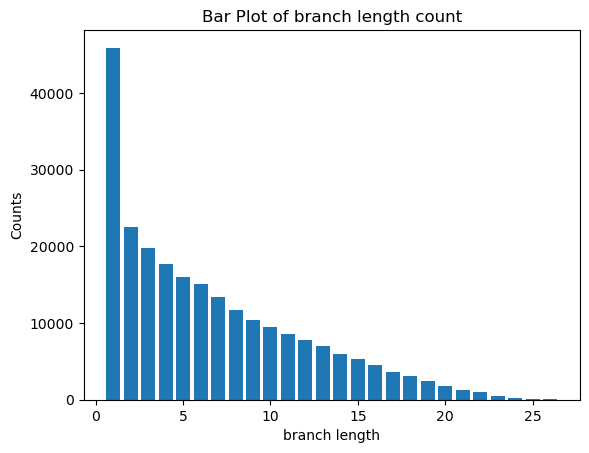

Average length of main branches is 24.24
All sub branches is within the range 1 - 26
Average length of sub branches is 6.58
with std 5.27


In [7]:
branch_length_list = []
for i, datapoint in enumerate(dataset):
    one_channel = datapoint[1]
    non_zero_counts_per_column = torch.sum(one_channel != 0, dim=0)
    branch_length_list.append(non_zero_counts_per_column)
    
tensor = torch.stack(branch_length_list)

only_branch = tensor[:, 1:]

non_zero_sub_branch = only_branch[only_branch != 0]
unique_values, counts = np.unique(non_zero_sub_branch.numpy(), return_counts=True)

plt.bar(unique_values, counts)
plt.xlabel('branch length')
plt.ylabel('Counts')
plt.title('Bar Plot of branch length count')
plt.show()

main_branch = tensor[:, 0]

print(f"Average length of main branches is {torch.mean(main_branch.float()):.2f}")
print(f"All sub branches is within the range {non_zero_sub_branch.min()} - {non_zero_sub_branch.max()}")
print(f"Average length of sub branches is {torch.mean(non_zero_sub_branch.float()):.2f}")
print(f"with std {torch.std(non_zero_sub_branch.float()):.2f}")

five branches trees:


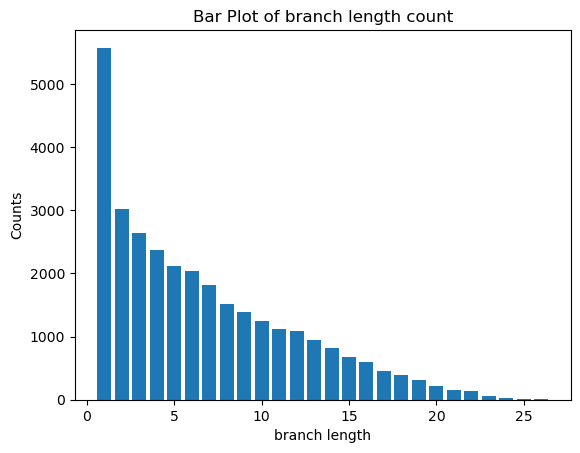

Average length of main branches in galaxies with five branches is 24.23
For galaxies with five branches, the branches is within the range 1 - 26
Average length of sub branches in galaxies with five branchesis 6.64
With std 5.22


six branches trees:


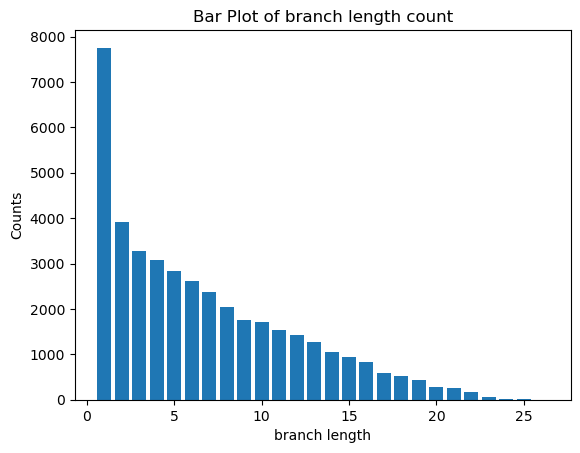

Average length of main branches in galaxies with six branches is 24.13
For galaxies with six branches, the branches is within the range 1 - 26
Average length of sub branches in galaxies with six branchesis 6.65
With std 5.25


seven branches trees:


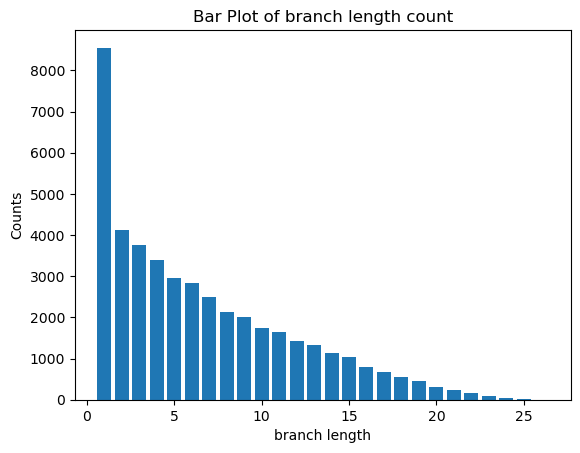

Average length of main branches in galaxies with seven branches is 24.13
For galaxies with seven branches, the branches is within the range 1 - 26
Average length of sub branches in galaxies with seven branchesis 6.57
With std 5.23


eight branches trees:


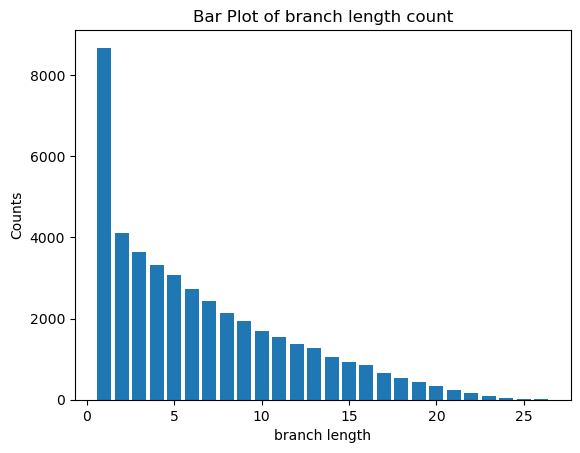

Average length of main branches in galaxies with eight branches is 24.20
For galaxies with eight branches, the branches is within the range 1 - 26
Average length of sub branches in galaxies with eight branchesis 6.51
With std 5.25


nine branches trees:


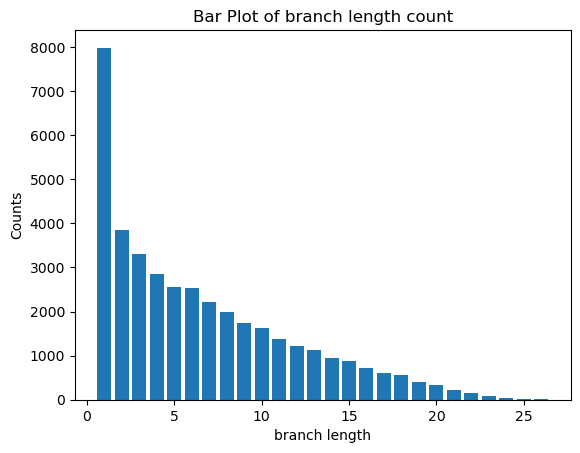

Average length of main branches in galaxies with nine branches is 24.39
For galaxies with nine branches, the branches is within the range 1 - 26
Average length of sub branches in galaxies with nine branchesis 6.54
With std 5.31


ten branches trees:


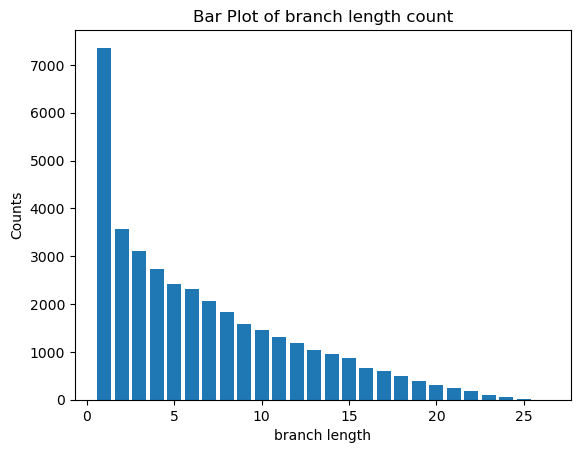

Average length of main branches in galaxies with ten branches is 24.55
For galaxies with ten branches, the branches is within the range 1 - 26
Average length of sub branches in galaxies with ten branchesis 6.61
With std 5.37




In [8]:
branch_length_list = []
for i, branch_list in enumerate(all_branch_data):
    name = all_name[i]
    length_list = []
    print(f"{name} branches trees:")
    for j, datapoint in enumerate(branch_list):
        one_channel = datapoint[1]
        non_zero_counts_per_column = torch.sum(one_channel != 0, dim=0)
        length_list.append(non_zero_counts_per_column)

    tensor = torch.stack(length_list)

    only_branch = tensor[:, 1:]
    
    non_zero_sub_branch = only_branch[only_branch != 0]
    unique_values, counts = np.unique(non_zero_sub_branch.numpy(), return_counts=True)

    plt.bar(unique_values, counts)
    plt.xlabel('branch length')
    plt.ylabel('Counts')
    plt.title('Bar Plot of branch length count')
    plt.show()

    non_zero_sub_branch = only_branch[only_branch != 0]

    main_branch = tensor[:, 0]

    print(f"Average length of main branches in galaxies with {name} branches is {torch.mean(main_branch.float()):.2f}")
    print(f"For galaxies with {name} branches, the branches is within the range {non_zero_sub_branch.min()} - {non_zero_sub_branch.max()}")
    print(f"Average length of sub branches in galaxies with {name} branchesis {torch.mean(non_zero_sub_branch.float()):.2f}")
    print(f"With std {torch.std(non_zero_sub_branch.float()):.2f}")
    print("\n")

# we can conclude that the structure/patterns in galaxies with different branches are fairly similar. Approximately same length of sub branches, same length of main branch, same max length of sub branch, same min length of sub branches

# check differences between variables in branches

In [9]:
for i in range(3):
    if i == 0:
        name = "dist"
    elif i == 1:
        name = "mass"
    elif i == 2:
        name = "subh"
        
    nonzero_indices_five = torch.nonzero(five[:, i].flatten())
    nonzero_values_five = five[:, i].flatten()[nonzero_indices_five[:, 0]]
    
    nonzero_indices_six = torch.nonzero(six[:, i].flatten())
    nonzero_values_six = six[:, i].flatten()[nonzero_indices_six[:, 0]]
    
    nonzero_indices_seven = torch.nonzero(seven[:, i].flatten())
    nonzero_values_seven = seven[:, i].flatten()[nonzero_indices_seven[:, 0]]
    
    nonzero_indices_eight = torch.nonzero(eight[:, i].flatten())
    nonzero_values_eight = eight[:, i].flatten()[nonzero_indices_eight[:, 0]]
    
    nonzero_indices_nine = torch.nonzero(nine[:, i].flatten())
    nonzero_values_nine = nine[:, i].flatten()[nonzero_indices_nine[:, 0]]
    
    nonzero_indices_ten = torch.nonzero(ten[:, i].flatten())
    nonzero_values_ten = ten[:, i].flatten()[nonzero_indices_ten[:, 0]]
    
    print(f"\n{name}")
    if i != 2:
        print("\nMinimum")
        print(f"5 branch galaxies {name} minimum = ", round(nonzero_values_five.min().item(), 5))
        print(f"6 branch galaxies {name} minimum = ", round(nonzero_values_six.min().item(), 5))
        print(f"7 branch galaxies {name} minimum = ", round(nonzero_values_seven.min().item(), 5))
        print(f"8 branch galaxies {name} minimum = ", round(nonzero_values_eight.min().item(), 5))
        print(f"9 branch galaxies {name} minimum = ", round(nonzero_values_nine.min().item(), 5))
        print(f"10 branch galaxies {name} minimum = ",round( nonzero_values_ten.min().item(), 5))

        print("\nMaxmimum:")
        print(f"5 branch galaxies {name} maximum = ", round(nonzero_values_five.max().item(), 4))
        print(f"6 branch galaxies {name} maximum = ", round(nonzero_values_six.max().item(), 4))
        print(f"7 branch galaxies {name} maximum = ", round(nonzero_values_seven.max().item(), 4))
        print(f"8 branch galaxies {name} maximum = ", round(nonzero_values_eight.max().item(), 4))
        print(f"9 branch galaxies {name} maximum = ", round(nonzero_values_nine.max().item(), 4))
        print(f"10 branch galaxies {name} maximum = ", round(nonzero_values_ten.max().item(), 4))

    print("\nMean:")
    print(f"5 branch galaxies {name} mean = ", round(nonzero_values_five.mean().item(), 4))
    print(f"6 branch galaxies {name} mean = ", round(nonzero_values_six.mean().item(), 4))
    print(f"7 branch galaxies {name} mean = ", round(nonzero_values_seven.mean().item(), 4))
    print(f"8 branch galaxies {name} mean = ", round(nonzero_values_eight.mean().item(), 4))
    print(f"9 branch galaxies {name} mean = ", round(nonzero_values_nine.mean().item(), 4))
    print(f"10 branch galaxies {name} mean = ", round(nonzero_values_ten.mean().item(), 4))


dist

Minimum
5 branch galaxies dist minimum =  0.00044
6 branch galaxies dist minimum =  0.00059
7 branch galaxies dist minimum =  0.00044
8 branch galaxies dist minimum =  0.00059
9 branch galaxies dist minimum =  0.0004
10 branch galaxies dist minimum =  0.00027

Maxmimum:
5 branch galaxies dist maximum =  1.5691
6 branch galaxies dist maximum =  1.0919
7 branch galaxies dist maximum =  1.755
8 branch galaxies dist maximum =  1.601
9 branch galaxies dist maximum =  1.5951
10 branch galaxies dist maximum =  1.4681

Mean:
5 branch galaxies dist mean =  0.0603
6 branch galaxies dist mean =  0.0624
7 branch galaxies dist mean =  0.0643
8 branch galaxies dist mean =  0.0664
9 branch galaxies dist mean =  0.0688
10 branch galaxies dist mean =  0.0715

mass

Minimum
5 branch galaxies mass minimum =  7.78978
6 branch galaxies mass minimum =  7.77685
7 branch galaxies mass minimum =  7.77206
8 branch galaxies mass minimum =  7.67804
9 branch galaxies mass minimum =  7.72937
10 branch galaxi

# check sparseness - zeroes

In [31]:
zero = len(dist[dist == 0.0].flatten().numpy())
nonzero = len(dist[dist != 0.0].flatten().numpy())

print(f"There are {100*zero/nonzero:.2f} times more zero values than nonzero values")
print(f"The proportion of zero values is {100*zero/(nonzero+zero):.2f}% of all values")

zero2 = len(mass[mass == 0.0].flatten().numpy())
nonzero2 = len(mass[mass != 0.0].flatten().numpy())

print(f"\nThere are {100*zero2/nonzero2:.2f} times more zero values than nonzero values")
print(f"The proportion of zero values is {100*zero2/(nonzero2+zero2):.2f}% of all values")


zero3 = len(subh[subh == 0.0].flatten().numpy())
nonzero3 = len(subh[subh != 0.0].flatten().numpy())

print(f"\nThere are {100*zero3/nonzero3:.2f} times more zero values than nonzero values")
print(f"The proportion of zero values is {100*zero3/(nonzero3+zero3):.2f}% of all values")


zero4 = zero + zero2 + zero3
nonzero4 = nonzero + nonzero2 + nonzero3

print(f"\nThere are {100*zero4/nonzero4:.2f} times more zero values than nonzero values")
print(f"The proportion of zero values is {100*zero4/(nonzero4+zero4):.2f}% of all values")

There are 632.44 times more zero values than nonzero values
The proportion of zero values is 86.35% of all values

There are 349.26 times more zero values than nonzero values
The proportion of zero values is 77.74% of all values

There are 349.26 times more zero values than nonzero values
The proportion of zero values is 77.74% of all values

There are 415.73 times more zero values than nonzero values
The proportion of zero values is 80.61% of all values


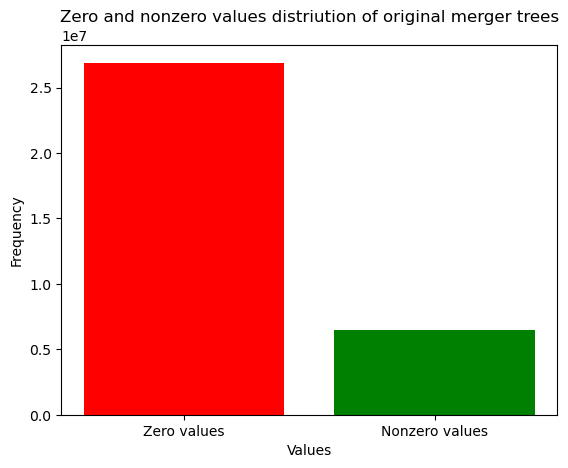

In [41]:

names = ["Zero values", "Nonzero values"]

plt.bar(x = names, height = [zero4, nonzero4], color = ["r", "g"])

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Zero and nonzero values distriution of original merger trees')
plt.savefig("zero_nonzero.png")
# Show the plot
plt.show()

# check variables

In [3]:
dist = dataset[:, 0]
mass = dataset[:, 1]
subh = dataset[:, 2]

In [11]:
for i in range(3):
    print("\n")
    if i == 0:
        name = "dist"
        print(name)
        
    elif i == 1:
        name = "mass"
        print(name)
    elif i == 2:
        name = "subhalo"
        print(name)
        
    tensor = dataset[:, i]
    # Create a mask for nonzero values
    nonzero_mask = (tensor != 0)
    # Extract nonzero values using the mask
    nonzero_values = tensor[nonzero_mask]
    # Check the minimum nonzero value
    print(f"Minimum value of {name} is:", round(tensor.min().item(),2))
    if len(nonzero_values) > 0:
        min_nonzero_value = torch.min(nonzero_values).item()
        print(f"Minimum nonzero value of {name} is:", round(min_nonzero_value, 2))
    else:
        print("No nonzero values in the tensor.")
        
    print(f"Maximum value of {name} is:", round(tensor.max().item(),2))
    print(f"Mean value of {name} is:", round(tensor.mean().item(),2))



dist
Minimum value of dist is: 0.0
Minimum nonzero value of dist is: 0.0
Maximum value of dist is: 1.75
Mean value of dist is: 0.01


mass
Minimum value of mass is: 0.0
Minimum nonzero value of mass is: 7.64
Maximum value of mass is: 10.98
Mean value of mass is: 2.03


subhalo
Minimum value of subhalo is: 0.0
Minimum nonzero value of subhalo is: 0.5
Maximum value of subhalo is: 1.0
Mean value of subhalo is: 0.2


# Distance

## histogram of what nonzero values are in the distance variable

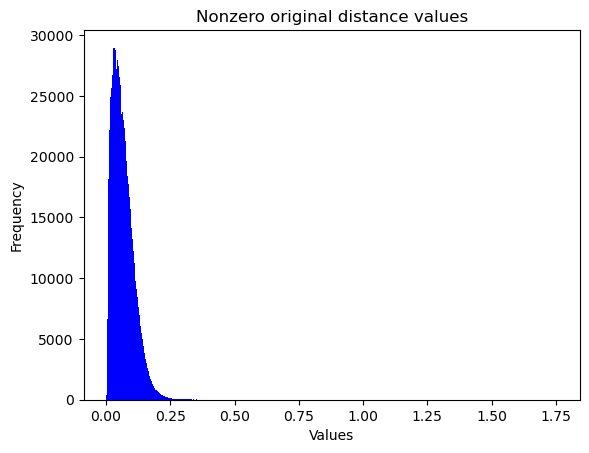

In [7]:
nonzero_indices_dist = torch.nonzero(dist.flatten())
nonzero_values_dist = dist.flatten()[nonzero_indices_dist[:, 0]]

plt.hist(torch.round(nonzero_values_dist, decimals = 4).numpy(), bins=1000, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Nonzero original distance values')

# Show the plot
plt.show()

In [13]:
print("nonzero distance values minimum = ", nonzero_values_dist.min().item())
print("nonzero distance values maximum = ", round(nonzero_values_dist.max().item(), 4))
print("nonzero distance values mean = ", round(nonzero_values_dist.mean().item(), 4))


print("\n")
Q1 = torch.quantile(nonzero_values_dist, 0.25)
Q3 = torch.quantile(nonzero_values_dist, 0.75)
print("Q1 = ", round(Q1.item(), 4))
print("Q3 = ", round(Q3.item(), 4))
IQR = Q3 - Q1
print("IQR = ", round(IQR.item(), 4))

# Set the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("lower bound = ", round(lower_bound.item(), 4))
print("upper bound = ", round(upper_bound.item(), 4))
print("Q3 + 2 x IQR = ", Q3 + 2 * IQR)

# Identify outliers
outliers = (nonzero_values_dist < lower_bound) | (nonzero_values_dist > upper_bound)

# Print the outliers
print(f"{len(nonzero_values_dist[outliers]) * 100 / len(nonzero_values_dist):.2f}% outliers by standard quartile outlier perspective")



nonzero distance values minimum =  0.000273
nonzero distance values maximum =  1.755
nonzero distance values mean =  0.0657


Q1 =  0.033
Q3 =  0.0896
IQR =  0.0566
lower bound =  -0.0518
upper bound =  0.1745
Q3 + 2 x IQR =  tensor(0.2027, dtype=torch.float64)
1.83% outliers by standard quartile outlier perspective


## we see that absolute majority of the nonzero distance values is in to lower range (0.0 - 0.25)

## check how many values are in the "no-mans-land" range (0.25 - 1.8) and (0.5 - 1.8)

In [14]:
# Specify upper and lower bounds
lower_bound = 0.145
upper_bound = 1.8

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_dist >= lower_bound) & (nonzero_values_dist <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))


lower_bound = 0.1745
upper_bound = 1.8

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_dist >= lower_bound) & (nonzero_values_dist <= upper_bound)).item()

print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))



lower_bound = 0.25
upper_bound = 1.8

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_dist >= lower_bound) & (nonzero_values_dist <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))

lower_bound = 0.5
upper_bound = 1.8

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_dist >= lower_bound) & (nonzero_values_dist <= upper_bound)).item()

print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))

lower_bound = 0.0
upper_bound = 0.2

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_dist >= lower_bound) & (nonzero_values_dist <= upper_bound)).item()

print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))


Count of values between 0.145 and 1.8: 74273 / 1518348 = 4.89%
Count of values between 0.1745 and 1.8: 27785 / 1518348 = 1.83%
Count of values between 0.25 and 1.8: 3592 / 1518348 = 0.24%
Count of values between 0.5 and 1.8: 301 / 1518348 = 0.02%
Count of values between 0.0 and 0.2: 1505715 / 1518348 = 99.17%


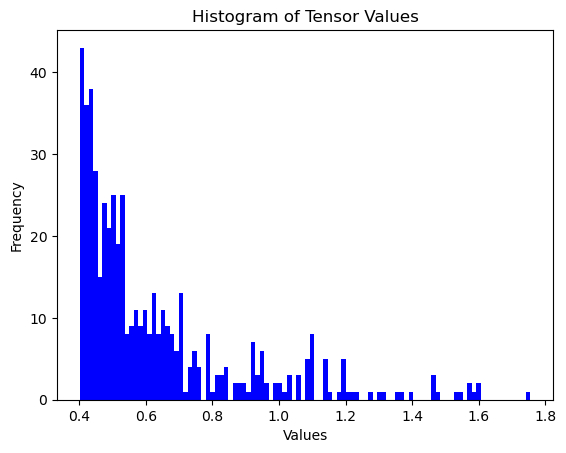

In [15]:
# Specify lower and upper bounds
lower_bound = 0.4
upper_bound = 1.8

# Create a boolean mask
mask = (nonzero_values_dist >= lower_bound) & (nonzero_values_dist <= upper_bound)

# Extract values within the specified range
values_in_range = nonzero_values_dist[mask]


plt.hist(torch.round(values_in_range, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

# These results indicates that the majority of nonzero distance values are between 0.0 and 0.1, in fact 80% of the values are between 0.0 and 0.1, and 99.17% of the values are between 0.0 and 0.2.

# In a prediction task, it might be hard to make the difference between 0.1 and 0.0, which can explain why the models struggle with predicting the distance variable.

# even when normalizing the data, the distribution wont change

# mass

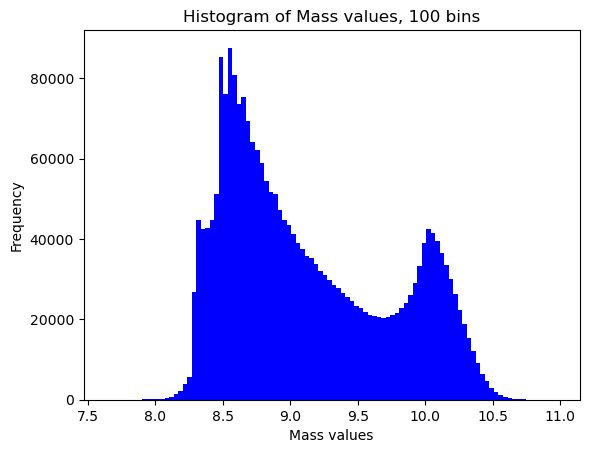

In [16]:
nonzero_indices_mass = torch.nonzero(mass.flatten())
nonzero_values_mass = mass.flatten()[nonzero_indices_mass[:, 0]]

plt.hist(torch.round(nonzero_values_mass, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Mass values')
plt.ylabel('Frequency')
plt.title('Histogram of Mass values, 100 bins')

# Show the plot
plt.show()

In [17]:
print("nonzero mass values minimum = ", round(nonzero_values_mass.min().item(), 4))
print("nonzero mass values maximum = ", round(nonzero_values_mass.max().item(), 4))
print("nonzero mass values mean = ", round(nonzero_values_mass.mean().item(), 4))

nonzero mass values minimum =  7.6377
nonzero mass values maximum =  10.9763
nonzero mass values mean =  9.1345


## wierd distribution with two tops, but it works

## outliers

In [18]:
# Specify upper and lower bounds
lower_bound = 0.0
upper_bound = 8.2

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_mass >= lower_bound) & (nonzero_values_mass <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))

# Specify upper and lower bounds
lower_bound = 10.5
upper_bound = 12.0

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_values_mass >= lower_bound) & (nonzero_values_mass <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_values_dist),count_values_in_range * 100 / len(nonzero_values_dist)))


print("\n")
Q1 = torch.quantile(nonzero_values_mass, 0.25)
Q3 = torch.quantile(nonzero_values_mass, 0.75)
print("Q1 = ", round(Q1.item(), 4))
print("Q3 = ", round(Q3.item(), 4))
IQR = Q3 - Q1
print("IQR = ", round(IQR.item(), 4))

# Set the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (nonzero_values_mass < lower_bound) | (nonzero_values_mass > upper_bound)

# Print the outliers
print(f"{len(nonzero_values_mass[outliers]) * 100 / len(nonzero_values_mass):.2f}% outliers by standard quartile outlier perspective")

Count of values between 0.0 and 8.2: 4921 / 1518348 = 0.32%
Count of values between 10.5 and 12.0: 5120 / 1518348 = 0.34%


Q1 =  8.6149
Q3 =  9.6498
IQR =  1.0349
0.00% outliers by standard quartile outlier perspective


# subhalo

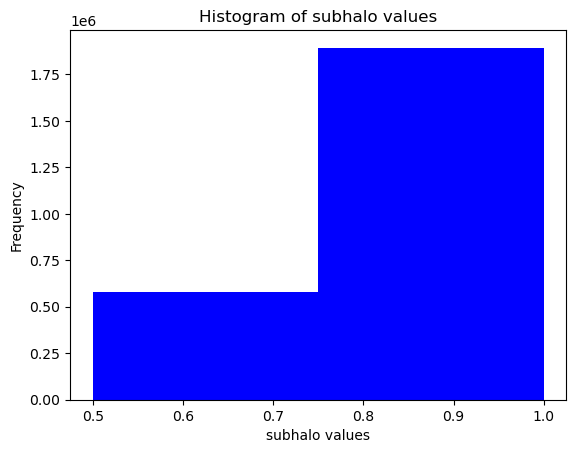

In [19]:
nonzero_indices_subh = torch.nonzero(subh.flatten())
nonzero_values_subh = subh.flatten()[nonzero_indices_subh[:, 0]]

plt.hist(torch.round(nonzero_values_subh, decimals = 4).numpy(), bins=2, color='blue')

# Customize the plot
plt.xlabel('subhalo values')
plt.ylabel('Frequency')
plt.title('Histogram of subhalo values')

# Show the plot
plt.show()

In [20]:
unique_values, counts = torch.unique(nonzero_values_subh, return_counts=True)

# Display unique values and their counts
for value, count in zip(unique_values, counts):
    print("Value: {}, Count: {}".format(value.item(), count.item()))

print(f"ratio: {counts[1] / counts.sum():.2f} in favor of 1.0 (main haloes)")

Value: 0.5, Count: 581572
Value: 1.0, Count: 1893802
ratio: 0.77 in favor of 1.0 (main haloes)


#### more main haloes than subhaloes / sattelites, as expected

#### the relationship is not too dominated by main haloes

# Normalization of distance variable

### original nonzero distance distribution

In [21]:
dist.shape

torch.Size([38348, 29, 10])

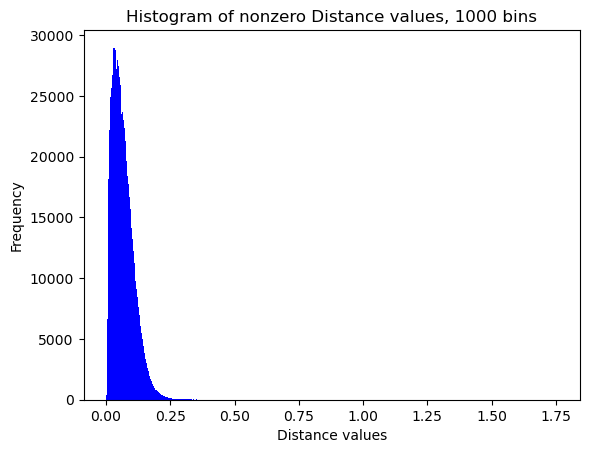

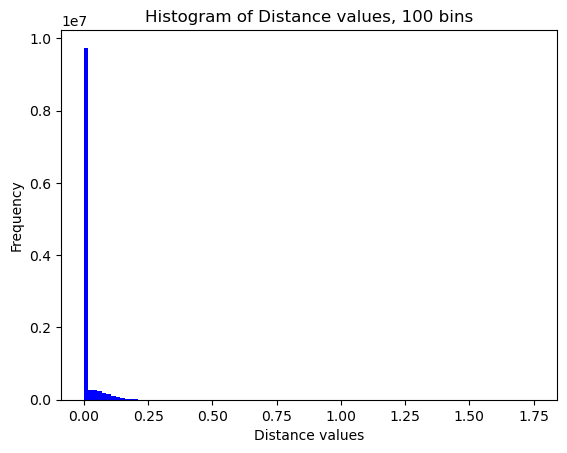

nonzero distance values minimum =  0.000273
nonzero distance values maximum =  1.755
nonzero distance values mean =  0.0657


In [22]:
plt.hist(torch.round(nonzero_values_dist, decimals = 4).numpy(), bins=1000, color='blue')

# Customize the plot
plt.xlabel('Distance values')
plt.ylabel('Frequency')
plt.title('Histogram of nonzero Distance values, 1000 bins')

# Show the plot
plt.show()


plt.hist(torch.round(dist.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Distance values')
plt.ylabel('Frequency')
plt.title('Histogram of Distance values, 100 bins')

# Show the plot
plt.show()


print("nonzero distance values minimum = ", nonzero_values_dist.min().item())
print("nonzero distance values maximum = ", round(nonzero_values_dist.max().item(), 4))
print("nonzero distance values mean = ", round(nonzero_values_dist.mean().item(), 4))

#### want to bump the low values and squeeze the high ones, so that the low values are seperable from 0.0

### log normalizing

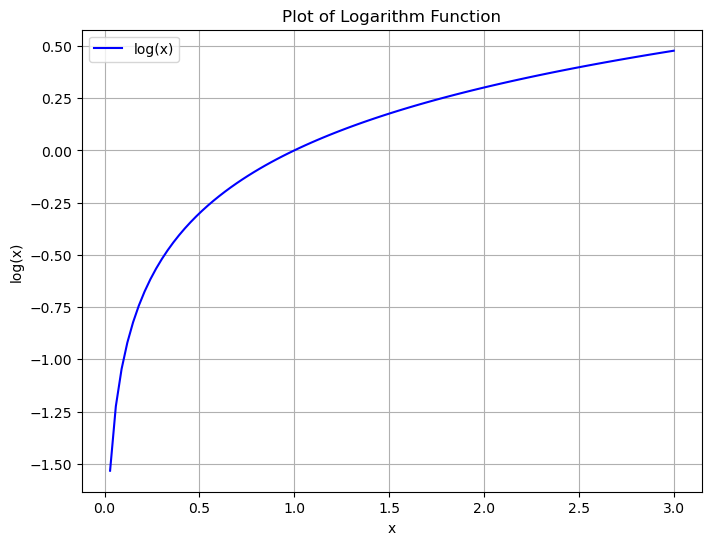

In [23]:
def log_normalization(tensor, in_scale = 1, in_add = 1):
    return torch.log10(in_scale * tensor + in_add)

x = torch.Tensor(np.linspace(-0.001, 3, 100))

y = log_normalization(x, 1, 0)

# Plot the log function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='log(x)', color='blue')
plt.title('Plot of Logarithm Function')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
scale_in_dist = (10 - 1) / dist.max().item()

scale_in_nonzer_dist = (10 - 1) / dist.max().item()

log_normalized_dist = log_normalization(dist, in_scale = scale_in_dist).flatten()
log_normalized_nonzero_dist = log_normalization(nonzero_values_dist, in_scale = scale_in_dist)

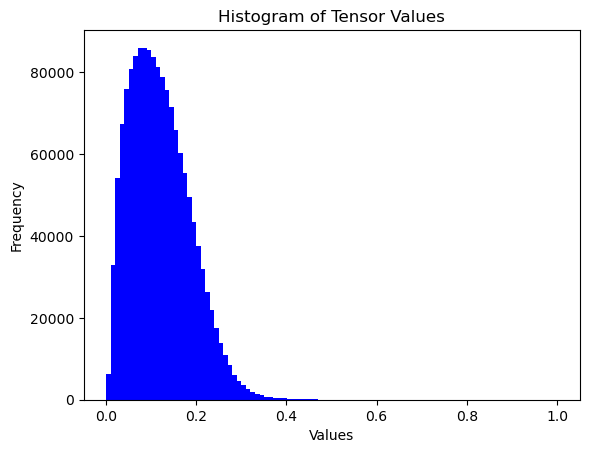

nonzero distance values minimum =  0.0006
nonzero distance values maximum =  1.0
nonzero distance values mean =  0.1207


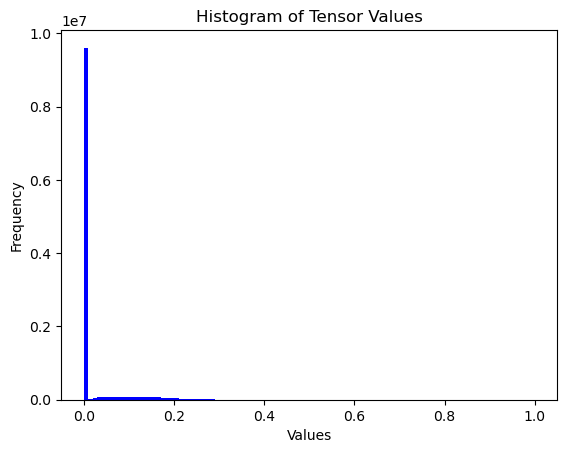

distance values minimum =  0.0
distance values maximum =  1.0
distance values mean =  0.0165


In [25]:
plt.hist(torch.round(log_normalized_nonzero_dist, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()
print("nonzero distance values minimum = ", round(log_normalized_nonzero_dist.min().item(), 4))
print("nonzero distance values maximum = ", round(log_normalized_nonzero_dist.max().item(), 4))
print("nonzero distance values mean = ", round(log_normalized_nonzero_dist.mean().item(), 4))

plt.hist(torch.round(log_normalized_dist, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()
print("distance values minimum = ", round(log_normalized_dist.min().item(), 4))
print("distance values maximum = ", round(log_normalized_dist.max().item(), 4))
print("distance values mean = ", round(log_normalized_dist.mean().item(), 4))

#### get a very low mean value with just log normalization

## log normalization with high scale

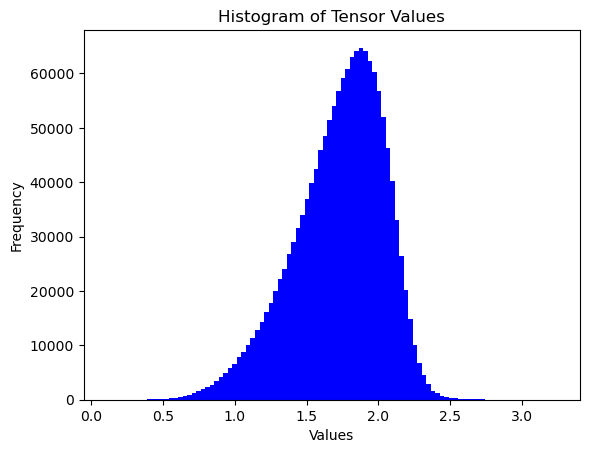

nonzero distance values minimum =  0.1048
nonzero distance values maximum =  3.2445
nonzero distance values mean =  1.7255


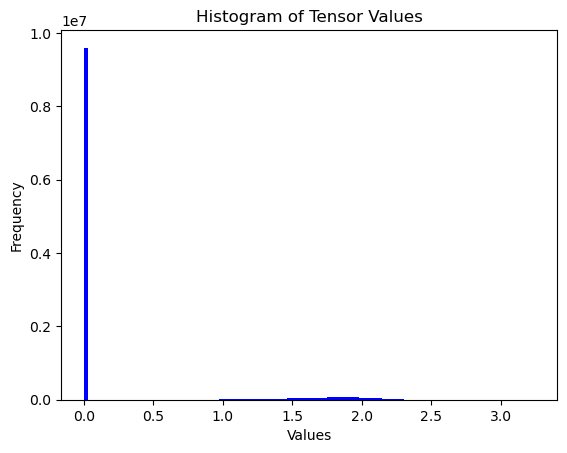

distance values minimum =  0.0
distance values maximum =  3.2445
distance values mean =  0.2356


In [26]:
scale_in_dist = 1000

log_normalized_dist = log_normalization(dist, in_scale = scale_in_dist).flatten()
log_normalized_nonzero_dist = log_normalization(nonzero_values_dist, in_scale = scale_in_dist)

plt.hist(torch.round(log_normalized_nonzero_dist, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()
print("nonzero distance values minimum = ", round(log_normalized_nonzero_dist.min().item(), 4))
print("nonzero distance values maximum = ", round(log_normalized_nonzero_dist.max().item(), 4))
print("nonzero distance values mean = ", round(log_normalized_nonzero_dist.mean().item(), 4))

plt.hist(torch.round(log_normalized_dist, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()
print("distance values minimum = ", round(log_normalized_dist.min().item(), 4))
print("distance values maximum = ", round(log_normalized_dist.max().item(), 4))
print("distance values mean = ", round(log_normalized_dist.mean().item(), 4))

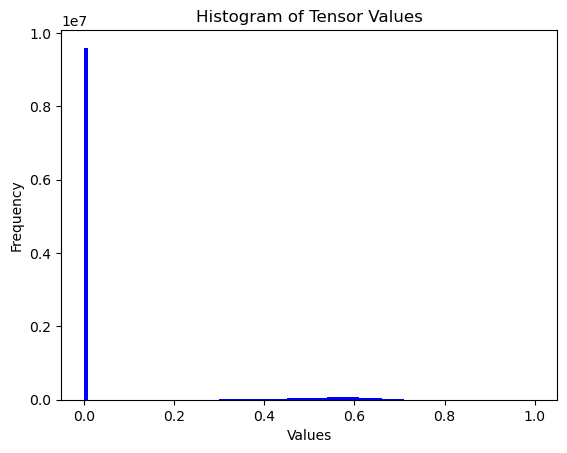

mass values minimum =  0.0
mass values maximum =  1.0
mass values mean =  0.0726


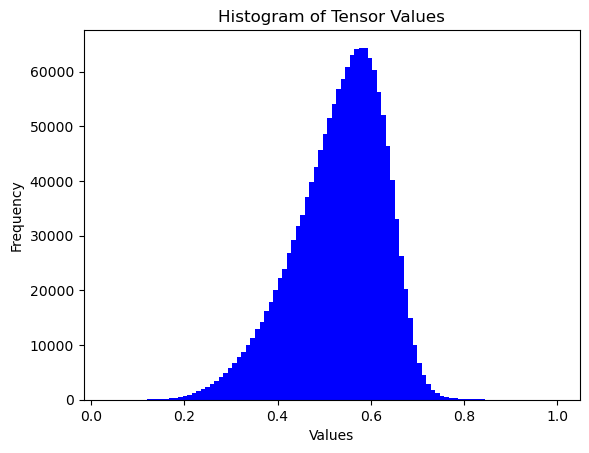

nonzero mass values minimum =  0.0323
nonzero mass values maximum =  1.0
nonzero mass values mean =  0.5318
Count of values between 0.0 and 0.2: 2086 / 1518348 = 0.14%


In [27]:
min_values_log_dist = log_normalized_dist.min()
max_values_log_dist = log_normalized_dist.max()
logg_dist_normalized = (log_normalized_dist - min_values_log_dist) / (max_values_log_dist - min_values_log_dist)

nonzero_log_dist_ind_normalized = torch.nonzero(logg_dist_normalized.flatten())
nonzero_log_dist_normalized = logg_dist_normalized.flatten()[nonzero_log_dist_ind_normalized[:, 0]]


plt.hist(torch.round(logg_dist_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("mass values minimum = ", round(logg_dist_normalized.min().item(), 4))
print("mass values maximum = ", round(logg_dist_normalized.max().item(), 4))
print("mass values mean = ", round(logg_dist_normalized.mean().item(), 4))


plt.hist(torch.round(nonzero_log_dist_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero mass values minimum = ", round(nonzero_log_dist_normalized.min().item(), 4))
print("nonzero mass values maximum = ", round(nonzero_log_dist_normalized.max().item(), 4))
print("nonzero mass values mean = ", round(nonzero_log_dist_normalized.mean().item(), 4))


# Specify upper and lower bounds
lower_bound = 0.0
upper_bound = 0.2

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_log_dist_normalized >= lower_bound) & (nonzero_log_dist_normalized <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_log_dist_normalized),count_values_in_range * 100 / len(nonzero_log_dist_normalized)))


In [28]:
dist.max()

tensor(1.7550, dtype=torch.float64)

In [29]:
logg_dist_normalized.max()

tensor(1., dtype=torch.float64)

In [30]:
def log_normalization(tensor, in_scale = 1, in_add = 1):
    return torch.log10(in_scale * tensor + in_add)

def log_inverse(tensor, in_scale = 1, in_add = 1):
    
    return (10**tensor - in_add) / e

logg_dist_normalized = (log_normalized_dist - min_values_log_dist) / (max_values_log_dist - min_values_log_dist)


def denormalize(tensor, mini, maxi):
    
    return (tensor * (maxi - mini)) + mini

def log_denormalization(tensor, mini, maxi, in_scale = 1, in_add = 1):
    tensor = denormalize(tensor, mini, maxi)
    tensor = log_inverse(tensor, in_scale, in_add)
    return tensor

### clipping normalizing
#### if x > max, then x' = max, that means setting outlier values to a threshold value, then normalizing

### use Q3 + 2 * IQR as an upper outlier threshold, that means we cut 0.83% of the nonzero values down to 0.2

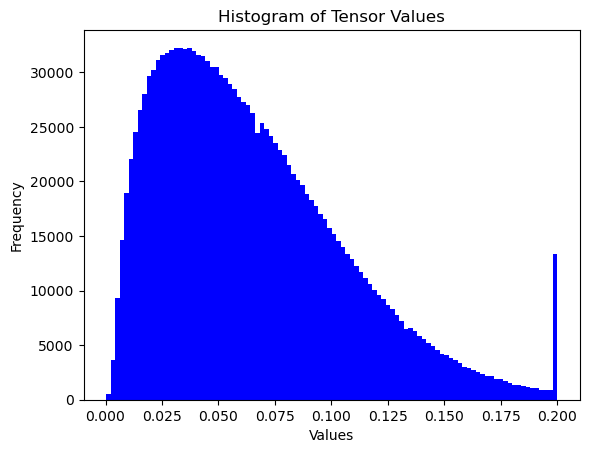

Count of values between 0.0 and 0.2: 1518348 / 1518348 = 100.00%


In [31]:
def threshold_tensor(tensor, threshold_value, replace_value):
    thresholded_tensor = torch.where(tensor > threshold_value, replace_value, tensor)
    return thresholded_tensor

threshold_value = 0.2
replace_value = 0.2
clipped_nonzero_dist = threshold_tensor(nonzero_values_dist, threshold_value, replace_value)

plt.hist(torch.round(clipped_nonzero_dist, decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

lower_bound = 0.0
upper_bound = 0.2

# Count values between upper and lower bounds
count_values_in_range = torch.sum((clipped_nonzero_dist >= lower_bound) & (clipped_nonzero_dist <= upper_bound)).item()

print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(clipped_nonzero_dist),count_values_in_range * 100 / len(clipped_nonzero_dist)))


### if we clip the original data, then minmax normalize it

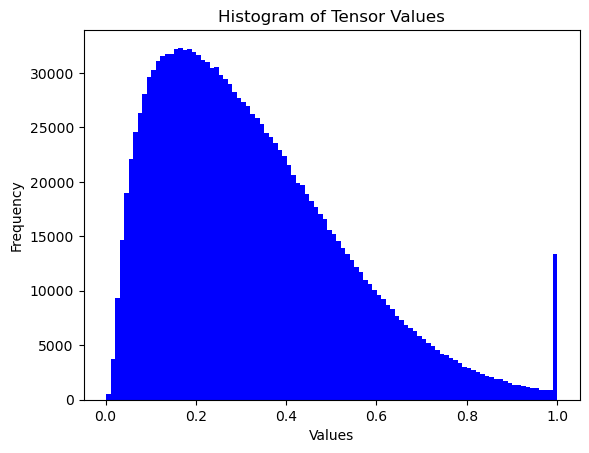

nonzero distance values minimum =  0.0014
nonzero distance values maximum =  1.0
nonzero distance values mean =  0.3263
Count of values between 0.0 and 0.2: 491413 / 1518348 = 32.36%


In [32]:
# clipped dist
clipped_dist = threshold_tensor(dist, threshold_value, replace_value)

# minmax normalize between 0 and 1
min_values = clipped_dist.min()
max_values = clipped_dist.max()
normalized_clipped_dist = (clipped_dist - min_values) / (max_values - min_values)

# find nonzero values
nonzero_clip_norm_indices_dist = torch.nonzero(normalized_clipped_dist.flatten())
nonzero_clip_norm_dist = normalized_clipped_dist.flatten()[nonzero_clip_norm_indices_dist[:, 0]]

# plot nonzero values
plt.hist(torch.round(nonzero_clip_norm_dist.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance values minimum = ", round(nonzero_clip_norm_dist.min().item(), 4))
print("nonzero distance values maximum = ", round(nonzero_clip_norm_dist.max().item(), 4))
print("nonzero distance values mean = ", round(nonzero_clip_norm_dist.mean().item(), 4))

# Specify upper and lower bounds
lower_bound = 0.0
upper_bound = 0.2

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_clip_norm_dist >= lower_bound) & (nonzero_clip_norm_dist <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_clip_norm_dist),count_values_in_range * 100 / len(nonzero_clip_norm_dist)))


#### fairly good distribution, better nonzero average, went from 0.0657 to 0.3263

### clipping original data, then log normalize it

all clipped distance values minimum =  0.0
all clipped distance values maximum =  0.2
all clipped distance values mean =  0.0089


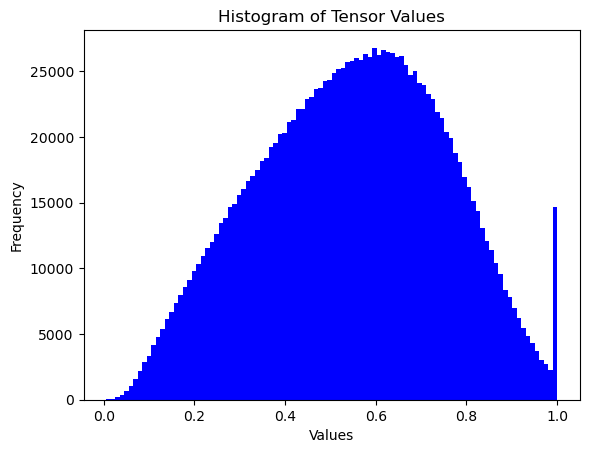

nonzero distance values minimum =  0.0053
nonzero distance values maximum =  1.0
nonzero distance values mean =  0.5475
Count of values between 0.0 and 0.2: 78070 / 1518348 = 5.14%


In [33]:
# clipped dist
clipped_dist = threshold_tensor(dist, threshold_value, replace_value)

print("all clipped distance values minimum = ", round(clipped_dist.min().item(), 4))
print("all clipped distance values maximum = ", round(clipped_dist.max().item(), 4))
print("all clipped distance values mean = ", round(clipped_dist.mean().item(), 4))

# scale to make max value 1:
# add 1 inside log to shift it so that all values are positive and log(0 + 1) = 0
scale_in = (10**(1) - 1) / clipped_dist.max().item()
# log normalize
add = 1
log_normalized_dist = log_normalization(clipped_dist, scale_in, add).flatten()

# find nonzero values
nonzero_log_norm_indices_dist = torch.nonzero(log_normalized_dist.flatten())
nonzero_log_norm_dist = log_normalized_dist.flatten()[nonzero_log_norm_indices_dist[:, 0]]

# plot nonzero values
plt.hist(torch.round(nonzero_log_norm_dist.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance values minimum = ", round(nonzero_log_norm_dist.min().item(), 4))
print("nonzero distance values maximum = ", round(nonzero_log_norm_dist.max().item(), 4))
print("nonzero distance values mean = ", round(nonzero_log_norm_dist.mean().item(), 4))

# Specify upper and lower bounds
lower_bound = 0.0
upper_bound = 0.2

# Count values between upper and lower bounds
count_values_in_range = torch.sum((nonzero_log_norm_dist >= lower_bound) & (nonzero_log_norm_dist <= upper_bound)).item()


print("Count of values between {} and {}: {} / {} = {:.2f}%".format(lower_bound, upper_bound, count_values_in_range, len(nonzero_log_norm_dist),count_values_in_range * 100 / len(nonzero_log_norm_dist)))


#### even more normal distributed, except bump at 1.0 (0.2 before normalized), with mean of 0.4211

### add 0.5 to all nonzero values

In [34]:
def add_value(tensor, value = 0.5):
    tensor1 = tensor.clone()
    
    
    nonzero_mask = tensor1 != 0

    # Add 0.5 to nonzero values
    tensor1[nonzero_mask] += 0.5
    
    return tensor1

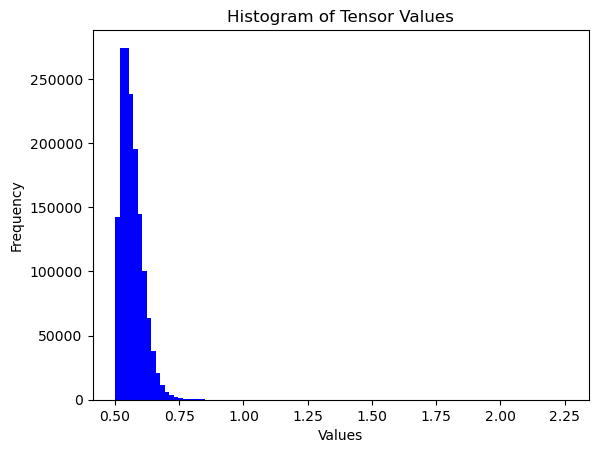

nonzero distance added 0.5 values minimum =  0.5003
nonzero distance added 0.5 values maximum =  2.255
nonzero distance added 0.5 values mean =  0.5657


In [35]:
dist_add_values = add_value(dist)

nonzer_dist_add_value = torch.nonzero(dist_add_values.flatten())
nonzero_dist_add_value = dist_add_values.flatten()[nonzer_dist_add_value[:, 0]]

# plot nonzero values
plt.hist(torch.round(nonzero_dist_add_value.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance added 0.5 values minimum = ", round(nonzero_dist_add_value.min().item(), 4))
print("nonzero distance added 0.5 values maximum = ", round(nonzero_dist_add_value.max().item(), 4))
print("nonzero distance added 0.5 values mean = ", round(nonzero_dist_add_value.mean().item(), 4))

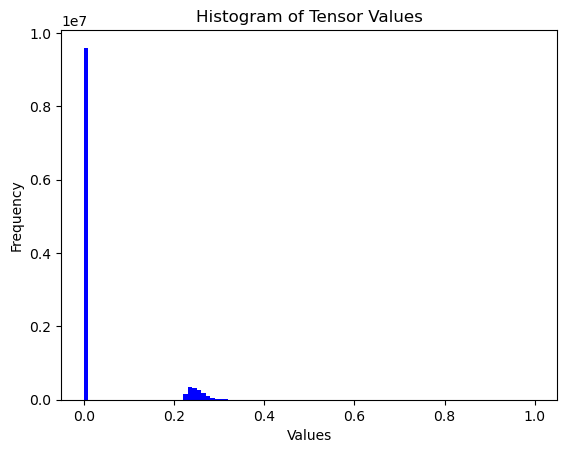

nonzero distance added 0.5 values minimum =  0.0
nonzero distance added 0.5 values maximum =  1.0
nonzero distance added 0.5 values mean =  0.0343


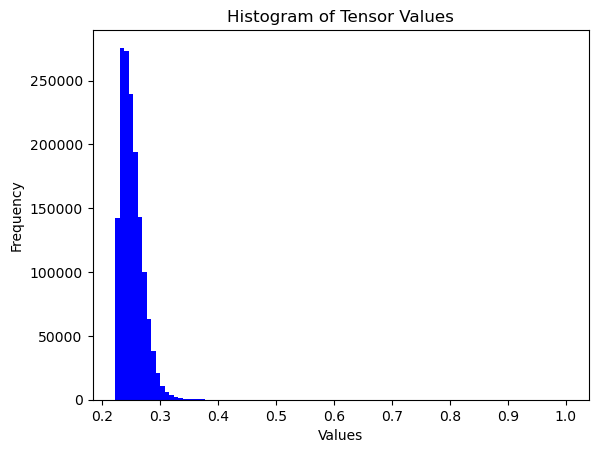

nonzero distance added 0.5 values minimum =  0.2219
nonzero distance added 0.5 values maximum =  1.0
nonzero distance added 0.5 values mean =  0.2509


In [36]:
min_values_add_dist = dist_add_values.min()
max_values_add_dist = dist_add_values.max()
add_dist_normalized = (dist_add_values - min_values_add_dist) / (max_values_add_dist - min_values_add_dist)

# plot nonzero values
plt.hist(torch.round(add_dist_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance added 0.5 values minimum = ", round(add_dist_normalized.min().item(), 4))
print("nonzero distance added 0.5 values maximum = ", round(add_dist_normalized.max().item(), 4))
print("nonzero distance added 0.5 values mean = ", round(add_dist_normalized.mean().item(), 4))

nonzer_dist_add_value = torch.nonzero(add_dist_normalized.flatten())
nonzero_dist_add_value = add_dist_normalized.flatten()[nonzer_dist_add_value[:, 0]]

# plot nonzero values
plt.hist(torch.round(nonzero_dist_add_value.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero distance added 0.5 values minimum = ", round(nonzero_dist_add_value.min().item(), 4))
print("nonzero distance added 0.5 values maximum = ", round(nonzero_dist_add_value.max().item(), 4))
print("nonzero distance added 0.5 values mean = ", round(nonzero_dist_add_value.mean().item(), 4))

# Normalizing mass

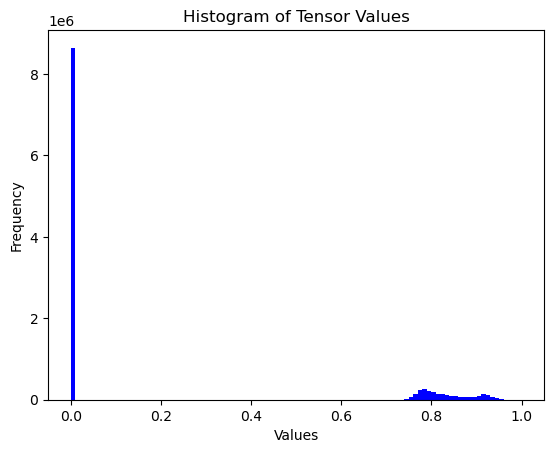

mass values minimum =  0.0
mass values maximum =  1.0
mass values mean =  0.1852


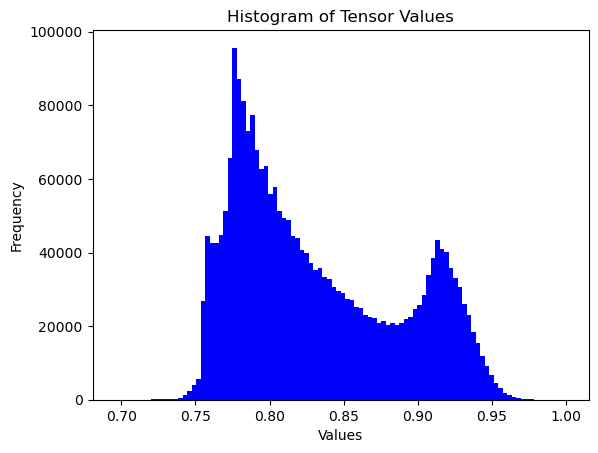

nonzero mass values minimum =  0.6958
nonzero mass values maximum =  1.0
nonzero mass values mean =  0.8322


In [37]:
min_values_mass = mass.min()
max_values_mass = mass.max()
mass_normalized = (mass - min_values_mass) / (max_values_mass - min_values_mass)

nonzero_mass_ind_normalized = torch.nonzero(mass_normalized.flatten())
nonzero_mass_normalized = mass_normalized.flatten()[nonzero_mass_ind_normalized[:, 0]]


plt.hist(torch.round(mass_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("mass values minimum = ", round(mass_normalized.min().item(), 4))
print("mass values maximum = ", round(mass_normalized.max().item(), 4))
print("mass values mean = ", round(mass_normalized.mean().item(), 4))


plt.hist(torch.round(nonzero_mass_normalized.flatten(), decimals = 4).numpy(), bins=100, color='blue')

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tensor Values')

# Show the plot
plt.show()

print("nonzero mass values minimum = ", round(nonzero_mass_normalized.min().item(), 4))
print("nonzero mass values maximum = ", round(nonzero_mass_normalized.max().item(), 4))
print("nonzero mass values mean = ", round(nonzero_mass_normalized.mean().item(), 4))



# Looks good!

# what to do with subhalo???
## dont need normalization, categorical value.
# one hot encode:

In [39]:
five_channel = torch.load('data/five_channel_distlognorm_massnorm.pt')
print(five_channel.shape)
assert five_channel.shape == torch.Size([38348, 5, 29, 10])

torch.Size([38348, 5, 29, 10])


In [40]:
# assert that the one-hot encoding worked
rand = torch.randint(0, len(five_channel), (5, 1))
for num in rand:
    print(torch.sum(five_channel[0, 2] + five_channel[0, 3] + five_channel[0, 4]).item())
    assert torch.sum(five_channel[0, 2] + five_channel[0, 3] + five_channel[0, 4]) == 29 * 10

290.0
290.0
290.0
290.0
290.0


# if not one-hot encode: map function that maps predicted values back to 0.0, 0.5 and 1.0, so we dont have values like 0.495

In [41]:
def map_values(tensor, lower_threshold = 0.19, upper_threshold = 0.77):
    """
    Map values of a tensor between 0 and 1 to 0.0, 0.5, or 1.0 based on thresholds.

    Args:
    - tensor: Input tensor with values between 0 and 1.
    - lower_threshold: Lower threshold for mapping (inclusive).
    - upper_threshold: Upper threshold for mapping (exclusive).

    Returns:
    - mapped_tensor: Tensor with values mapped to 0.0, 0.5, or 1.0.
    """

    # Create a tensor of zeros with the same shape as the input tensor
    mapped_tensor = torch.zeros_like(tensor)

    # Map values based on thresholds
    mapped_tensor[[tensor < lower_threshold]] = 0.0
    mapped_tensor[(tensor > lower_threshold) & (tensor < upper_threshold)] = 0.5
    mapped_tensor[tensor >= upper_threshold] = 1.0

    return mapped_tensor

# from a test in the Autoencoder notebook, I checked which values for upper and lower bound was the best in terms of mapping back. using lower bound = 0.19 and upper bound = 0.77 got a total pixel-wise average similarity between subhalo variable of original picture and generated picture using the map function of 99.58%, and a total of 17594 / 38348 = 45.88% of images were 100% identical to the original input.